# Project: Wrangle and Analyze Data

## Table of contents

### I. Introduction

### II. Gathering Data

### III. Assessing Data

### IV. Cleaning Data

### V. Analyzing Data & Visualization

## I. Introduction
The main objective of this project is to improve data wrangling skills through the utilization of real-world data. The data wrangling process entails three key steps: gathering, assessing, and cleaning. In this particular case, the dataset utilized for the project is the tweet archive from the Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs in a humorous manner, providing amusing comments about each dog. Initially, I will collect data from various sources in different formats. Subsequently, I will assess the data both visually and programmatically to identify any issues related to data quality and tidiness. Once identified, I will proceed with programmatic cleaning to resolve these issues. Finally, I will analyze the cleaned dataset and present the results through visualizations.

## II. Gathering Data

In [23]:
# import libraries
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Download and upload file `twitter-archive-enhanced.csv` and read it into a Pandas DataFrame

In [6]:
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2: Download file `image-predictions.tsv` and read it into a Pandas DataFrame

In [8]:
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3: Collect data 

Queried each tweet's retweet count and favorite ("like") count using the twitter_api.py. I will use the data file that Udacity has already collected and can be downloaded by link: https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt

In [4]:
# Import some libraries first
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
# Get information by using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
res = requests.get(url)
print(res)

<Response [200]>


In [3]:
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(res.content)

#### 4: Read `fweet-json.txt` line by line into a Pandas DataFrame

In [10]:
def read_text_file_to_df(file_name):
    datas = []
    columns = []
    with open(file_name, 'r') as f:
        lines = f.readlines()
        for line in lines:
            obj = json.loads(line)
            columns = obj.keys()
            datas.append({col: obj.get(col) for col in columns})

    return pd.DataFrame(datas, columns=columns)

In [21]:
df_tweet = read_text_file_to_df('tweet-json.txt')
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


I use 3 column: `id`, `retweet_count` and `favorite_count`. Then rename `id` by `tweet_id`

In [22]:
use_columns = ['id', 'retweet_count', 'favorite_count']
df_tweet = df_tweet[use_columns]
df_tweet.rename(columns={'id': 'tweet_id'}, inplace=True)
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## III. Assessing Data

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

Data quality dimensions:

- Completeness
- Validity
- Accuracy
- Consistency

Tidy data requirements:

- Each variable should form a column
- Each observation should form a row
- Each type of observational unit should form a table

##### df_twitter_archive_enhanced

In [24]:
df_twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [25]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
# check duplication record
df_twitter_archive_enhanced.duplicated().sum()

0

In [28]:
# check duplicated tweet_id
df_twitter_archive_enhanced['tweet_id'].duplicated().sum()

0

In [29]:
# count value for column rating_numerator
df_twitter_archive_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [30]:
# count value for column rating_denominator
df_twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [31]:
# count value for column doggo
df_twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [32]:
# count value for column floofer
df_twitter_archive_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [33]:
# count value for column pupper
df_twitter_archive_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [34]:
# count value for column puppo
df_twitter_archive_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [35]:
# count value for column source
df_twitter_archive_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Observations:

1. The columns `in_reply_to_status_id`, `in_reply_to_user_id`, `in_reply_to_user_id` and `retweeted_status_user_id` of data type is `float64`, but should be convert to `int64` same column `tweet_id`.
2. Column `timestamp` is `object` should be convert to `datetime64` and remote '+0000'.
3. Only original ratings accompanied by pictures are required, so entries related to retweets and replies should be removed.
4. Column `rating_denominator` has most of the values 10, the other values appear only 1,2 or 3 times. These values appear to be abnormal. 
5. Abnormal values(count value few occurrences) also exist in the rating_numerator column, such as 88, 84, 960 ...
6. The `doggo`, `floofer`, `pupper`, and `puppo` columns represent different stages of dogs and should be combined into a single column.
7. The source information is redundant and not easily readable.
8. Delete columns that won't be used for analysis.

##### df_image_prediction

In [36]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [37]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [42]:
# check duplicated for column tweet_id
df_image_prediction['tweet_id'].duplicated().sum()

0

In [43]:
# check duplicated for column jpg_url
df_image_prediction['jpg_url'].duplicated().sum()

66

In [44]:
# count value for column p1
df_image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [45]:
# count value for column p2
df_image_prediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [46]:
# count value for column p3
df_image_prediction['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

#### Observations:

1. Column `jpg_url` have duplicate record. Should remove duplicate
2. Numerous entries do not correspond to dogs; they include unrelated items such as "orange", "banana", "ox" ...
3. Inconsistencies in capitalization are observed in the `p1`, `p2`, and `p3` columns.
4. Delete columns that won't be used for analysis

##### df_tweet

In [47]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [48]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [49]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [51]:
df_tweet.duplicated().sum()

0

In [52]:
# check duplicate for column tweet_id
df_tweet['tweet_id'].duplicated().sum()

0

#### Observations:
1. The data is good, keep original tweets only

## IV: Cleaning Data

The programmatic data cleaning process:

- Define: convert our assessments into defined cleaning tasks.
- Code: convert those definitions to code and run that code.
- Test: test the dataset, visually or with code, to make sure the cleaning operations worked.

In [ ]:
# copy origin data before cleaning
df_twitter_archive_enhanced_origin = df_twitter_archive_enhanced.copy()
df_image_prediction_origin = df_image_prediction.copy()
df_tweet_origin = df_tweet.copy()

### 1: df_twitter_archive_enhanced

##### Quality issue

1. Tweeter archive enchanced data: Because I only want original ratings (no retweets) that have images, I detete retweets and replies

Define:
   
- Use `isnull` to get rows have retweets and replies.

Code:

In [132]:
df_twitter_archive_enhanced = df_twitter_archive_enhanced[df_twitter_archive_enhanced['retweeted_status_id'].isnull()]
df_twitter_archive_enhanced = df_twitter_archive_enhanced[df_twitter_archive_enhanced['in_reply_to_status_id'].isnull()]

Test

In [133]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

2. Drop the columns related to retweets and replies. 

Define:

 - Use `DataFrame.drop` to delete the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

Code:

In [134]:
subnet_columns = ['in_reply_to_status_id', 
                  'in_reply_to_user_id', 
                  'retweeted_status_id', 
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp']
df_twitter_archive_enhanced = df_twitter_archive_enhanced.drop(subnet_columns, axis=1)

In [135]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


3. Remove '+000' and convert datetime

Define:

- Remove '+0000' and user `pd.to_datetime` to covert column `timestamp` to timestamp

Code:

In [136]:
# Remove +0000
df_twitter_archive_enhanced['timestamp'] = df_twitter_archive_enhanced['timestamp'].str[:-6]

# Convert to datetime
df_twitter_archive_enhanced['timestamp'] = pd.to_datetime(df_twitter_archive_enhanced['timestamp'])

Test:

In [137]:
df_twitter_archive_enhanced['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

4. Replace the long url with different category names

Define:
- Using the `series.replace` get category names from strings

Code:

In [138]:
df_twitter_archive_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [139]:
# get category names from source
df_twitter_archive_enhanced['source'] = df_twitter_archive_enhanced['source'].str.replace(r'<.*>(.*)<.*>', lambda x: x.groups()[0], regex=True)

Test:

In [140]:
df_twitter_archive_enhanced['source'].unique().tolist()

['Twitter for iPhone',
 'Twitter Web Client',
 'Vine - Make a Scene',
 'TweetDeck']

5. Delete rows not dogs in df_image_prediction

Define:
- Use `query` filter row not dogs
- Use `isin` and `~` get row is dogs

Code:

In [141]:
# Filter posts that are not dogs and put those tweet_id into a drop_list
not_dog_tweet_id = df_image_prediction.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the not_dog_tweet_id in all dataframes
df_image_prediction = df_image_prediction[~df_image_prediction['tweet_id'].isin(not_dog_tweet_id)]
df_twitter_archive_enhanced = df_twitter_archive_enhanced[~df_twitter_archive_enhanced['tweet_id'].isin(not_dog_tweet_id)]
df_tweet = df_tweet[~df_tweet.tweet_id.isin(not_dog_tweet_id)]

Test:

In [142]:
len(df_twitter_archive_enhanced)

1792

In [143]:
df_twitter_archive_enhanced.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.792000e+03,1792.000000,1792.000000
mean,7.398665e+17,11.407366,10.435826
std,6.746350e+16,7.231230,6.117892
min,6.660209e+17,0.000000,2.000000
25%,6.787321e+17,10.000000,10.000000
50%,7.149960e+17,11.000000,10.000000
75%,7.928013e+17,12.000000,10.000000
max,8.921774e+17,165.000000,150.000000


6. According to the project overview, the ratings almost always have a denominator of 10. Many abnormal rating values were gone after removing ratings not for dogs, making it easier to fix abnormal rating.

Define:
- Create new dataframe with columns: 'tweet_id', 'rating_numerator', 'rating_denominator' and 'text'.
- Filter rating_denominator not aqual to 10 and check correct these ratings.

Code:

In [144]:
# Create new dataframe
df_abnormal_rating = df_twitter_archive_enhanced[['tweet_id', 'rating_numerator', 'rating_denominator', 'text']]

# Filter rating_denominator not aqual to 10
df_abnormal_denominator = df_abnormal_rating[df_abnormal_rating['rating_denominator'] != 10]

pd.set_option('max_colwidth', None)
df_abnormal_denominator

,tweet_id,rating_numerator,rating_denominator,text
433,820690176645140481,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902,758467244762497024,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,9,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1165,722974582966214656,4,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,713900603437621249,99,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,710658690886586372,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,709198395643068416,45,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1351,704054845121142784,60,50,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa


In the column 'text', some records that no contain right rating in the, because it doesn't seem to be about dogs. So I consider it as junk data and will remove it from the dataset.

In [145]:
not_rating_tweet_ids = [820690176645140481,
                        810984652412424192, 
                        758467244762497024, 
                        713900603437621249, 
                        710658690886586372, 
                        709198395643068416, 
                        704054845121142784,
                        697463031882764288,
                        684222868335505415,
                        677716515794329600,
                        675853064436391936]
df_twitter_archive_enhanced = df_twitter_archive_enhanced[~df_twitter_archive_enhanced['tweet_id'].isin(not_rating_tweet_ids)]

Correct ratings by reading through the text, most of the abnormal ratings are associated with multiple dogs. The rest of the records contain 10 point rating information, I will update the correct value.

In [146]:
df_abnormal_denominator[~df_abnormal_denominator['tweet_id'].isin(not_rating_tweet_ids)]

,tweet_id,rating_numerator,rating_denominator,text
1068,740373189193256964,9,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1165,722974582966214656,4,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1662,682962037429899265,7,11,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
2335,666287406224695296,1,2,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [147]:
def correct_rating_value(df, fix_tweet_id, rating_numerator=None, rating_denominator=None):
    mask =  df['tweet_id'] == fix_tweet_id
    if rating_numerator:
        df.loc[mask, 'rating_numerator'] = rating_numerator
    if rating_denominator:
        df.loc[mask, 'rating_denominator'] = rating_denominator
        
correct_rating_value(df_twitter_archive_enhanced, 740373189193256964, 14, 10)
correct_rating_value(df_twitter_archive_enhanced, 722974582966214656, 13, 10)
correct_rating_value(df_twitter_archive_enhanced, 716439118184652801, 11, 10)
correct_rating_value(df_twitter_archive_enhanced, 682962037429899265, 10, 10)
correct_rating_value(df_twitter_archive_enhanced, 666287406224695296, 9, 10)

Test:

In [149]:
df_twitter_archive_enhanced['rating_denominator'].value_counts()

10    1781
Name: rating_denominator, dtype: int64

7. The removal of ratings that were not meant for dogs resulted in the elimination of numerous abnormal values in the rating_numerator.

Define:
- Use `value_counts` count value of column rating_numerator. I get data if count of value > 10. 

Code:

In [150]:
df_twitter_archive_enhanced['rating_numerator'].value_counts()

12    461
10    378
11    374
13    256
9     135
8      71
7      31
14     27
6      16
5      15
4       6
3       5
2       2
27      1
0       1
26      1
75      1
Name: rating_numerator, dtype: int64

As the result above:
- Rating values less than 10 record is 4, 3, 2, 27, 0, 26, 75

In [151]:
df_abnormal_rating = df_twitter_archive_enhanced[df_twitter_archive_enhanced['rating_numerator'].isin([4, 3, 2, 27, 0, 26, 75])]

df_abnormal_rating

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
765,777885040357281792,2016-09-19 15:00:20,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
1004,747816857231626240,2016-06-28 15:40:07,Twitter for iPhone,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1189,718246886998687744,2016-04-08 01:19:36,Twitter for iPhone,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,10,Alexanderson,None,None,None,None
1249,711306686208872448,2016-03-19 21:41:44,Twitter for iPhone,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
1303,707420581654872064,2016-03-09 04:19:44,Twitter for iPhone,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,None,None,None,None
1701,680940246314430465,2015-12-27 02:36:20,Twitter for iPhone,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,https://twitter.com/dog_rates/status/680940246314430465/photo/1,4,10,Alice,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


Rows above are wrong rating and not map with contain in text column. 'tweet_id' not map is 786709082849828864, 778027034220126208 and 680494726643068929. I will update this.


In [152]:
correct_rating_value(df_twitter_archive_enhanced, 786709082849828864, 9.75)
correct_rating_value(df_twitter_archive_enhanced, 778027034220126208, 11.27)
correct_rating_value(df_twitter_archive_enhanced, 680494726643068929, 11.26)

I checked that below list of tweet ids are not relate to dog

- 707420581654872064 -> goat
- 680940246314430465 -> goat
- 673906403526995968 -> cat
- 671122204919246848 -> duck
- 667176164155375616 -> camel
- 666649482315059201 -> cow

I remove them out of dataset.

In [153]:
not_dog_tweet_ids = [707420581654872064,
                    680940246314430465,
                    673906403526995968,
                    671122204919246848,
                    667176164155375616,
                    666649482315059201]
df_twitter_archive_enhanced = df_twitter_archive_enhanced[~df_twitter_archive_enhanced['tweet_id'].isin(not_dog_tweet_ids)]

Test:

In [154]:
df_twitter_archive_enhanced['rating_numerator'].value_counts()

12.00    461
10.00    378
11.00    374
13.00    256
9.00     135
8.00      71
7.00      31
14.00     27
6.00      16
5.00      15
3.00       4
2.00       2
11.27      1
0.00       1
4.00       1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

### 2. df_image_prediction

In [155]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


1.  Only the most confident prediction for the image is required.

Define: 
- Collect confidence index by taking priority from p1_dog > p2_dog > p3_dog

Code:

In [156]:
def collect_breed_with_priority(df, is_return_p_col):
    result = 'Unknown_breed', 0
    if df['p1_dog'] == True:
        result =  df['p1'], df['p1_conf']
    elif df['p2_dog'] == True:
        result =  df['p2'], df['p2_conf']
    elif df['p3_dog'] == True:
        result =  df['p3'], df['p3_conf']

    return result[0] if is_return_p_col else result[1]
     
        
# Apply the function by column        
df_image_prediction['breed'] = df_image_prediction.apply(collect_breed_with_priority, axis=1, is_return_p_col=True)
df_image_prediction['confident_ability'] = df_image_prediction.apply(collect_breed_with_priority, axis=1, is_return_p_col=False)

# Only keep useful columns
use_columns = ['tweet_id', 'jpg_url', 'breed', 'confident_ability']
df_image_prediction = df_image_prediction[use_columns]

Test:

In [157]:
df_image_prediction

,tweet_id,jpg_url,breed,confident_ability
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


2. Inconsistent capitalization in p1 column

Define:
- Use str.capitalize to capitalize the first letter

Code:

In [158]:
df_image_prediction['breed'] = df_image_prediction['breed'].str.capitalize()

/var/folders/sp/3g39myk533z6_4gvv18kdwd00000gn/T/ipykernel_70723/3741662736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_image_prediction['breed'] = df_image_prediction['breed'].str.capitalize()


In [159]:
df_image_prediction['breed']

0         Welsh_springer_spaniel
1                        Redbone
2                German_shepherd
3            Rhodesian_ridgeback
4             Miniature_pinscher
                  ...           
2069    Chesapeake_bay_retriever
2070                      Basset
2071          Labrador_retriever
2072                   Chihuahua
2073                   Chihuahua
Name: breed, Length: 1751, dtype: object

### Cleanliness

1. About `df_twitter_archive_enhanced`, transform the columns 'doggo', 'floofer', 'pupper' and 'puppo' in column 'dog_stage' 

Define: 
- Use pd.melt to melt the doggo, floofer, pupper and puppo columns to a type and dog_stage column. Drop the intermediate column.

Code:

In [162]:
twitter_archive_columns = df_twitter_archive_enhanced.columns.tolist()
value_columns =  ['doggo', 'floofer', 'pupper', 'puppo']
id_columns = list(set(twitter_archive_columns) - set(value_columns))
var_name = 'type'
value_name = 'dog_stage' 

In [184]:
# transform the columns "doggo," "floof," "pupper," and "puppo" into a single column called "dogs_stage" by melting them, while keeping the data type intact
df_twitter_archive_enhanced = pd.melt(df_twitter_archive_enhanced, 
                                id_vars = id_columns,
                                value_vars = value_columns, 
                                var_name = 'type', 
                                value_name = 'dog_stage')

# Drop type column  
df_twitter_archive_enhanced.drop(columns='type', inplace = True)

# Sort by dogs_stage and drop duplicates
df_twitter_archive_enhanced = df_twitter_archive_enhanced.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

Test:

In [185]:
df_twitter_archive_enhanced.dog_stage.value_counts()

None       1485
pupper      194
doggo        63
puppo        23
floofer      10
Name: dog_stage, dtype: int64

2. `df_tweet` should be part of the `df_twitter_archive_enhanced` table

Define:
- Use pandas.merge to merge the 'retweet_count', 'favorite_count' column to the df_twitter_archive_enhanced table, joining on 'tweet_id'.

Code:

In [187]:
df_twitter_archive_enhanced = df_twitter_archive_enhanced.merge(df_tweet, on=['tweet_id'], how='left')

Test:

In [188]:
df_twitter_archive_enhanced.head()

,expanded_urls,timestamp,source,tweet_id,name,rating_denominator,rating_numerator,text,dog_stage,retweet_count,favorite_count
0,https://twitter.com/dog_rates/status/667455448082227200/photo/1,2015-11-19 21:32:34,Twitter Web Client,667455448082227200,Reese,10,7.0,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,None,66,203
1,https://twitter.com/dog_rates/status/667470559035432960/photo/1,2015-11-19 22:32:36,Twitter Web Client,667470559035432960,a,10,11.0,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,102,273
2,https://twitter.com/dog_rates/status/667491009379606528/photo/1,2015-11-19 23:53:52,Twitter Web Client,667491009379606528,None,10,7.0,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,242,559
3,https://twitter.com/dog_rates/status/667495797102141441/photo/1,2015-11-20 00:12:54,Twitter Web Client,667495797102141441,Philippe,10,9.0,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,None,294,565
4,https://twitter.com/dog_rates/status/667502640335572993/photo/1,2015-11-20 00:40:05,Twitter Web Client,667502640335572993,Hall,10,11.0,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,None,231,563


3. `df_image_prediction` should be part of the `df_twitter_archive_enhanced` table

Define:

- Use pandas.merge to merge `df_image_prediction` with `df_twitter_archive_enhanced` table, joining on 'tweet_id'.

Code:

In [190]:
df_twitter_archive_enhanced = df_twitter_archive_enhanced.merge(df_image_prediction, on=['tweet_id'], how='left')

In [192]:
df_twitter_archive_enhanced.head()

,expanded_urls,timestamp,source,tweet_id,name,rating_denominator,rating_numerator,text,dog_stage,retweet_count,favorite_count,jpg_url,breed,confident_ability
0,https://twitter.com/dog_rates/status/667455448082227200/photo/1,2015-11-19 21:32:34,Twitter Web Client,667455448082227200,Reese,10,7.0,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,None,66,203,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
1,https://twitter.com/dog_rates/status/667470559035432960/photo/1,2015-11-19 22:32:36,Twitter Web Client,667470559035432960,a,10,11.0,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
2,https://twitter.com/dog_rates/status/667491009379606528/photo/1,2015-11-19 23:53:52,Twitter Web Client,667491009379606528,None,10,7.0,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
3,https://twitter.com/dog_rates/status/667495797102141441/photo/1,2015-11-20 00:12:54,Twitter Web Client,667495797102141441,Philippe,10,9.0,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
4,https://twitter.com/dog_rates/status/667502640335572993/photo/1,2015-11-20 00:40:05,Twitter Web Client,667502640335572993,Hall,10,11.0,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709


In [193]:
# Remote rows if jpg_url is null
df_twitter_archive_enhanced = df_twitter_archive_enhanced[~df_twitter_archive_enhanced['jpg_url'].isnull()]

In [194]:
sum(df_twitter_archive_enhanced['jpg_url'].isnull())

0

In [195]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1774
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   expanded_urls       1649 non-null   object        
 1   timestamp           1649 non-null   datetime64[ns]
 2   source              1649 non-null   object        
 3   tweet_id            1649 non-null   int64         
 4   name                1649 non-null   object        
 5   rating_denominator  1649 non-null   int64         
 6   rating_numerator    1649 non-null   float64       
 7   text                1649 non-null   object        
 8   dog_stage           1649 non-null   object        
 9   retweet_count       1649 non-null   int64         
 10  favorite_count      1649 non-null   int64         
 11  jpg_url             1649 non-null   object        
 12  breed               1649 non-null   object        
 13  confident_ability   1649 non-null   float64     

Dataset is clean, let export to twitter_archive_master.csv file

In [196]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
df_twitter_archive_enhanced.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

## V. Analyzing Data & Visualization

#### 1. Based on the number of original tweets, total number of retweets and total number of favorites, we can predict which type of dog is popular.

Text(0, 0.5, 'Dog Breeds')

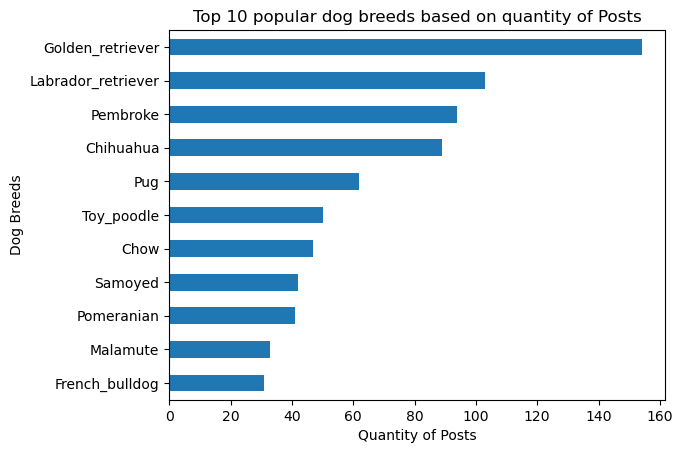

In [199]:
# Get top 10 bread dog
top_breed_dog = df['breed'].value_counts()[10::-1]

top_breed_dog.plot(kind = 'barh', title = 'Top 10 popular dog breeds based on quantity of Posts')
plt.xlabel('Quantity of Posts')
plt.ylabel('Dog Breeds')

From the chart we can see that Golden Retriever is the dog with the most searches (about more than 160 tweets). Ranked in 2nd place is the Labrador Retriever with more than 100 tweets. The next three positions in the top 5 are Pembroke, Chihuahua and Pug. We'll then plot to see popular dog breeds based on number of retweets and favorites.

Text(0.5, 1.0, 'Top 10 breeds based on number of favorite')

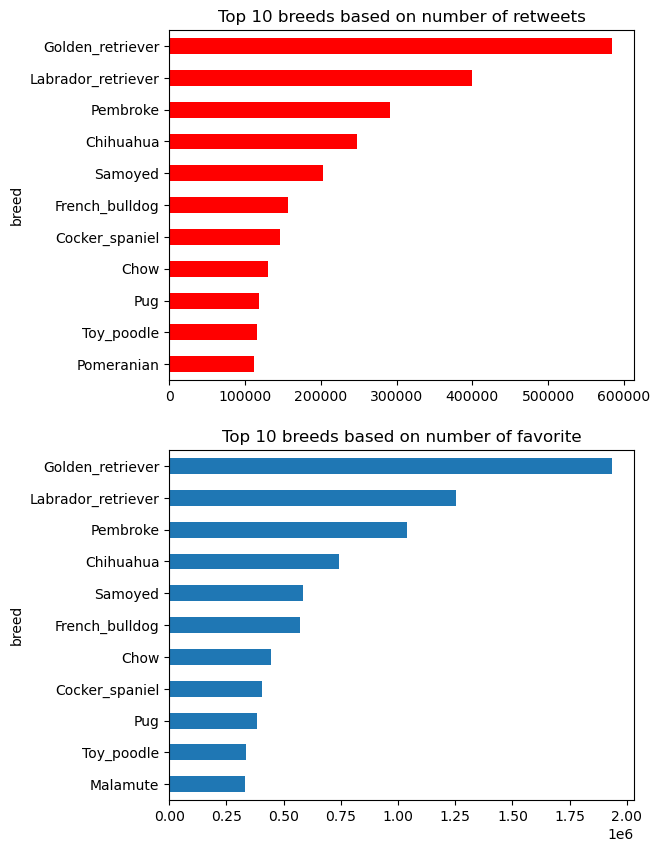

In [200]:
# Get data to plot
columns = ['breed', 'retweet_count', 'favorite_count']
df_breed = df[columns]

top_breed_retweet = df_breed.groupby('breed')['retweet_count'].agg('sum').sort_values(ascending=False)[10::-1]
top_breed_favorite = df_breed.groupby('breed')['favorite_count'].agg('sum').sort_values(ascending=False)[10::-1]

# set to show 2 char on one plot
f, (ax1, ax2) = plt.subplots(2, 1)

# Top 10 breeds based on number of retweets
top_breed_retweet.plot.barh(ax=ax1, figsize=(6,10), color='r')
ax1.set_title("Top 10 breeds based on number of retweets")

# Top 10 breeds based on number of favorite
top_breed_favorite.plot.barh(ax=ax2)
ax2.set_title("Top 10 breeds based on number of favorite")

Looking at the chart "Top 10 dog breeds based on number of retweets" we can see that the range of dog types in the top 10 is similar to "Top 10 popular dog breeds based on quantity of Posts". Includes Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug, Toy Poodle, Chow, Samoyed, Pomeranian and Malamute dog breeds. Regarding the "Top 10 breeds based on number of favorite" there are some variations. Specifically, the 5th breed is French_bulldog, the 6th breed is Chow, the 7th breed is Cocker_spaniel, and the 10th breed is Malamute. This resemblance between retweets and favorites can be attributed to the likelihood of people who retweet also favoriting the tweet. Overall, the consistent pattern observed across all three graphs confirms that Golden_retriever, Labrador_retriever, Pembroke, and Chihuahua dominate as the most popular dog breeds, with the Golden_retriever securing the top position as the most favored breed overall.

### 2. What is the most common dog stage?

In [201]:
# Dog stage and count
dog_stage_count = df['dog_stage'].value_counts(dropna=False, normalize=True)
dog_stage_count

None       0.844148
pupper     0.104912
doggo      0.032747
puppo      0.013341
floofer    0.004851
Name: dog_stage, dtype: float64

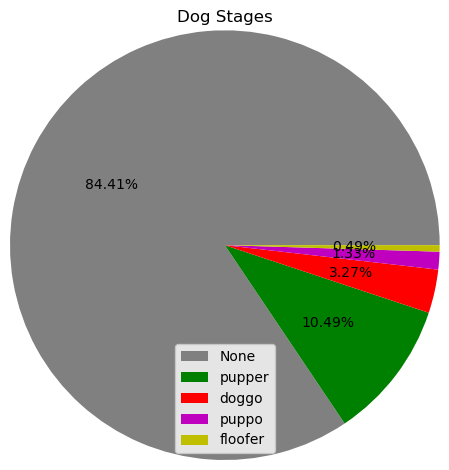

In [204]:
# Plot data pie chart
labels = dog_stage_count.index.to_list()
colors = ['gray', 'g', 'r' ,'m', 'y']
explode = (0, 0, 0, 0, 0)

plt.pie(dog_stage_count, colors=colors, explode=explode,
        autopct='%1.2f%%', radius = 1.25, shadow=False, counterclock=True)
plt.legend(labels)
plt.title('Dog Stages')
plt.tight_layout()

The chart shows that more than 84% of tweets have no dog-related information in the post. More than 10% mention the puppy dog. Other types of dogs are less commonly mentioned.

### 3. What source do users use to post?

In [206]:
# Dog stage and count
source_count = df['source'].value_counts(dropna=False, normalize=True)
source_count

Twitter for iPhone    0.981201
Twitter Web Client    0.013341
TweetDeck             0.005458
Name: source, dtype: float64

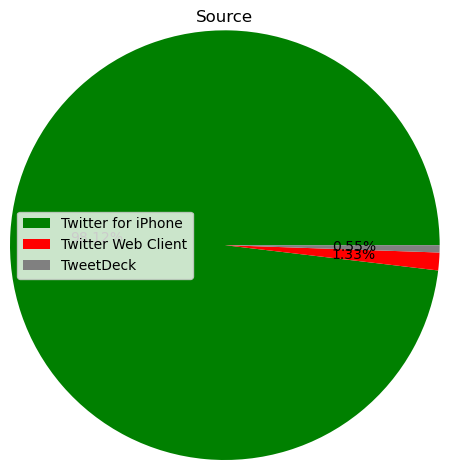

In [208]:
# Plot data pie chart
labels = source_count.index.to_list()
colors = ['g', 'r', 'gray']
explode = (0, 0, 0)

plt.pie(source_count, colors=colors, explode=explode,
        autopct='%1.2f%%', radius = 1.25, shadow=False, counterclock=True)
plt.legend(labels)
plt.title('Source')
plt.tight_layout()

We can see that the majority of users are iphone users(98%).

4. Rating numerator
Given that the rating denominator is typically 10 and the dataset has been cleaned, our attention will be directed towards the rating numerator.

In [209]:
df['rating_numerator'].value_counts()

12.00    421
10.00    359
11.00    353
13.00    222
9.00     132
8.00      68
7.00      31
14.00     22
6.00      16
5.00      14
3.00       4
2.00       2
11.26      1
9.75       1
0.00       1
4.00       1
11.27      1
Name: rating_numerator, dtype: int64

In [212]:
df['rating_numerator'].mean()

10.846743480897512

Text(0.5, 1.0, 'Rating numerator by histogram')

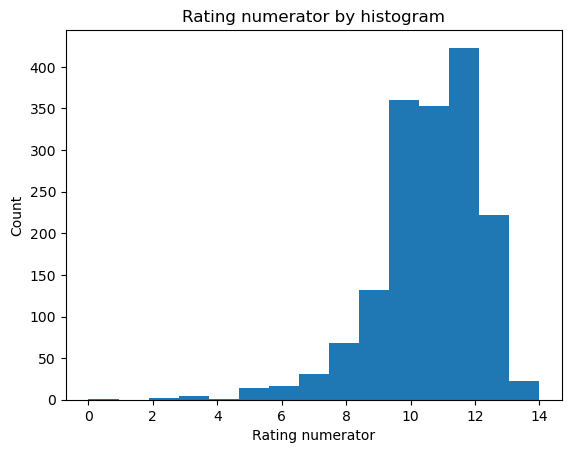

In [210]:
plt.hist(df['rating_numerator'], bins=15)
plt.xlabel('Rating numerator')
plt.ylabel('Count');
plt.title('Rating numerator by histogram')

From the chart and data, we can notice that the most common rating in tweets is 12, which was mentioned in 421 tweets, followed by 10 (359 tweets), 11 (353 tweets), and 13 ( 222 tweets). The average rating calculated from these data points amounts to 10.85.